### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
print('I am done')

I am done


### 2. Load Datasets

In [2]:
# Importing data frames
df_climate = pd.read_csv("data/Climate_Region.csv")
df_climate_melt = pd.read_csv("data/Climate_Region_Melted.csv")

### 3. Random Forest

In [3]:
#Random Forest

# Drop 'temperature' = NaN
df_climate_melt = df_climate_melt.dropna(subset=['temperature'])

# Define x and y
X = df_climate_melt.drop(['temperature', 'ISO3', 'ISO2', 'ObjectId', 'country'], axis=1)
y = df_climate_melt['temperature']

# Categorical and numerical features
categorical_features = ['region', 'sub-region']
numeric_features = ['year']  

# Transform features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error =', mse)

Mean squared error = 0.10504608782862727


#### Given the scale of climate change values varying from -1 to 3ºC the mean squared error suggests that the model has a acceptable predictive capability for this project.

### 4. Prediction

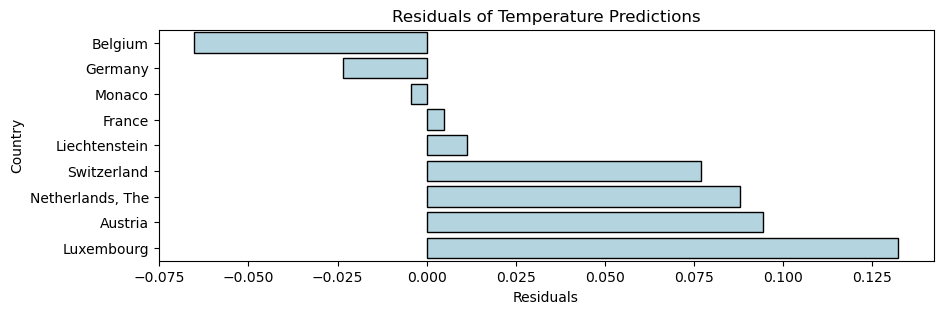

In [4]:
# Generate predictions — Western Europe

predicted_temperatures = pipeline.predict(X_test)
df_climate_melt.loc[X_test.index, 'predicted_temperature'] = predicted_temperatures

# Filter European countries
european_countries = df_climate_melt[df_climate_melt['sub-region'] == 'Western Europe']

# Calculate residuals only for rows where 'predicted_temperature' is not NaN
european_countries = european_countries.dropna(subset=['predicted_temperature'])
european_countries['residuals'] = european_countries['temperature'] - european_countries['predicted_temperature']

# Aggregate residuals by country and calculate the mean residual
residuals_by_country = european_countries.groupby('country')['residuals'].mean().reset_index()

# Plotting residuals
plt.figure(figsize=(10, 3))
sns.barplot(x='residuals', y='country', data=residuals_by_country.sort_values(by='residuals'), color='lightblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Country')
plt.title('Residuals of Temperature Predictions')
plt.show()

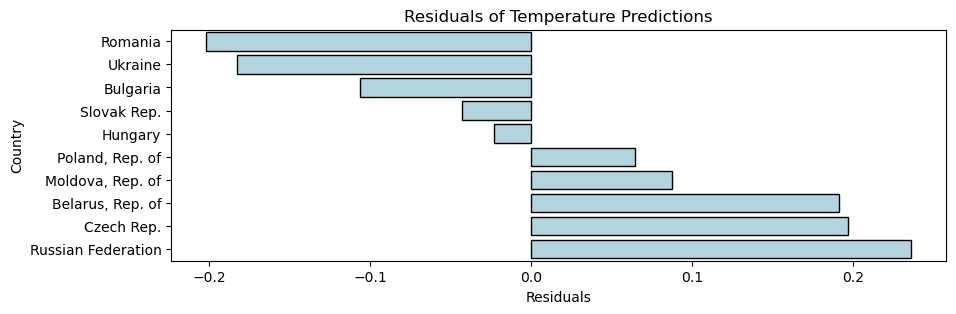

In [5]:
# Generate predictions — Eastern Europe

predicted_temperatures = pipeline.predict(X_test)
df_climate_melt.loc[X_test.index, 'predicted_temperature'] = predicted_temperatures

# Filter European countries
european_countries = df_climate_melt[df_climate_melt['sub-region'] == 'Eastern Europe']

# Calculate residuals only for rows where 'predicted_temperature' is not NaN
european_countries = european_countries.dropna(subset=['predicted_temperature'])
european_countries['residuals'] = european_countries['temperature'] - european_countries['predicted_temperature']

# Aggregate residuals by country and calculate the mean residual
residuals_by_country = european_countries.groupby('country')['residuals'].mean().reset_index()

# Plotting residuals
plt.figure(figsize=(10, 3))
sns.barplot(x='residuals', y='country', data=residuals_by_country.sort_values(by='residuals'), color='lightblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Country')
plt.title('Residuals of Temperature Predictions')
plt.show()